# Wstęp do Sztucznej Inteligencji - rok akademicki 2021/2022

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Optymalizacja globalna: Problem plecakowy - Zadania
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.


## Problem plecakowy
Problem plecakowy to problem optymalizacji dyskretnej. W swojej najprostszej wersji może być sformułowany następująco.

Spośród `N` dostępnych przedmiotów możmy zabrać taką ich liczbę by suma ich wag nie przekraczała pewnej dopuszczalnej wartości (maksymalne obciążenie plecaka). Każdy przedmiot, oprócz wagi, ma przypisaną swoją wartość. 

Które przedmioty zabrać, aby ich sumaryczna wartość była jak największa, ale ich sumaryczna waga nie przekraczała dopuszczalnej maksymalnej wagi plecaka?

Mamy zatem do czynienia z problemem optymalizacji z ograniczeniami.

Przeczytaj więcej o problemie plecakowym: https://pl.wikipedia.org/wiki/Problem_plecakowy

## Prosty generator problemu plecakowego (0-1 knapsack problem)

Generujemy listę przedmiotów, z losowymi wagami oraz wartościami z podanych przedziałów.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

#wmin - minimalna waga przedmiotu
#wmax - maksymalna waga przedmiotu
#vmin - minimalna wartość przedmiotu
#vmax - maksymalna wartość przedmiotu
#items_num - liczba dostępnych przedmiotów
def generate_problem(wmin, wmax, vmin, vmax, items_num):
    w = np.random.randint(wmin, wmax, size=items_num)  #weight
    v = np.random.randint(vmin, vmax, size=items_num)  #values
    return w, v

Przykładowy problem plecakowy (zwróć uwagę, że możemy zagwarantować generowanie za każdym razem tego samego problemu poprzez ustawienie ziarna generatora liczb losowych).

In [2]:
num = 50  # liczba przedmiotów
wmin = 1  # minimlana waga
wmax = 100  # maksymalna waga
vmin = 1  # minimalna wartosc
vmax = 100  # maksymalna wartosc
knapsack_perc = 0.5  # pojemnosc plecaka jako procent sumy wag wszystkich przedmiotow

# ustawienie ziarna
np.random.seed(1111)

w, v = generate_problem(wmin, wmax, vmin, vmax, num)  # w - wagi, v - wartosci
Wall = w.sum()
Vall = v.sum()
W = int(knapsack_perc * Wall) # pojemnosc plecaka

print('Problem plecakowy:')
print('pojemnosc plecaka:', W)
print('wagi:',w, 'suma:', Wall)
print('wartosci:',v, 'suma:', Vall)

Problem plecakowy:
pojemnosc plecaka: 1140
wagi: [29 56 82 13 35 53 25 23 21 12 15  9 13 87  9 63 62 52 43 77 95 79 77  5
 78 41 10 10 88 19  1 37  9 70 22 82 46 51 97 46 12 32 56 30 86 45 99 89
  1 88] suma: 2280
wartosci: [94 48 26 65 53 54 76 48 98 63 67 74 40 41 76  8 10 78 18 79 92 23  3 64
 22 43 24 75  8 36 78  6 98 33 49 31 15 21 30 44 14 75 55 22 71 95 94  9
 68 65] suma: 2479


## Zadanie 1 (obowiązkowe, 1pkt.) - rozwiązanie metodą brute force

Mamy problem plecakowy ze 100 przedmiotami. Chcemy sprawdzić każde możliwe rozwiązanie. Jeśli w ciągu sekundy moglibyśmy sprawdzić miliard rozwiązań, to ile lat by to trwało? Przyjmij, że rok ma 365 dni.

Otrzymaną liczbę lat przypisz do zmiennej o nazwie `liczba_lat`. Wynik zaokrąglij do pełnych lat w dół.

In [17]:
liczba_lat = 2**100 / 10**9 / 60 / 60 / 24 / 365
liczba_lat = int(liczba_lat)
print('Zajmie to: {} lat'.format(liczba_lat))

Zajmie to: 40196936841331 lat


## Kodowanie rozwiązania

Potencjalne rozwiązanie problemu plecakowego można zakodować jako wektor `0`/`1`, gdzie `1` oznacza wybranie przedmiotu do plecaka.

Warto skorzystać z kodowania `True`/`False` i tablic `numpy`, gdyż ułatwi to obliczenia (macierze True/False mogą służyć do indeksowania innych macierzy).

Przykładowo:

In [18]:
num = w.shape[0]
sol = np.random.randint(0, 2, size=num, dtype=bool)  # True oznacza, ze przedmiot jest wybrany

print('Rozwiązanie:', sol)
print('Lista wybranych przedmiotow:', np.arange(num)[sol])
print('Suma wag:', w[sol].sum())
print('Suma wartosci:', v[sol].sum())

Rozwiązanie: [False False  True False  True False False  True False  True False False
 False False False  True False  True False False False  True False False
  True False False False  True  True False False False  True False  True
  True  True False  True False  True False False False  True  True False
 False False]
Lista wybranych przedmiotow: [ 2  4  7  9 15 17 21 24 28 29 33 35 36 37 39 41 45 46]
Suma wag: 1002
Suma wartosci: 773


## Rozwiązania dopuszczalne i niedopuszczalne - procedura naprawcza

Jeśli suma wag przekracza pojemność plecaka, to rozwiązanie jest rozwiązaniem niedopuszczalnym i jest całkowicie nieprzydatne.

Rozwiązanie niedopuszczalne można poddać procedurze naprawczej. Przykładowo, poniższa funkcja usuwa przedmioty z plecaka, dopóki nie powstanie rozwiązanie dopuszczalne.

In [20]:
# Usuwa losowe przedmioty, aż rozwiązanie stanie się dopuszczalne
# Jesli rowziazanie jest dopuszczlane, nie zostanie zmienione
def correct_solution(w, v, W, sol):
    num = w.shape[0]
    while w[sol].sum() > W:
        indx = np.random.randint(num)
        while sol[indx%num] == False:
            indx = indx + 1
        sol[indx%num] = False

__Przykładowa naprawa:__

In [21]:
correct_solution(w, v, W, sol)

print('Rozwiązanie:', sol)
print('Lista wybranych przedmiotow:', np.arange(num)[sol])
print('Suma wag:', w[sol].sum())
print('Suma wartosci:', v[sol].sum())

Rozwiązanie: [False False  True False  True False False  True False  True False False
 False False False  True False  True False False False  True False False
  True False False False  True  True False False False  True False  True
  True  True False  True False  True False False False  True  True False
 False False]
Lista wybranych przedmiotow: [ 2  4  7  9 15 17 21 24 28 29 33 35 36 37 39 41 45 46]
Suma wag: 1002
Suma wartosci: 773


## Losowe, dopuszczalne rozwiązania

Bazując na powyższej procedurze, można zdefiniować funkcję generującą losowe, ale zawsze dopuszczalne rozwiązania.

In [24]:
def get_random_solution(w, v, W):
    num = w.shape[0]
    sol = np.random.randint(0,2, size=num, dtype=bool)  # 1 / True oznacza, ze przedmiot jest wybrany
    _V = np.sum(v[sol])
    _W = np.sum(w[sol])
    if _W > W:
        correct_solution(w,v,W,sol)
        _V = np.sum(v[sol])
        _W = np.sum(w[sol])
    return sol, _W, _V

__Przykład użycia:__

In [27]:
sol = get_random_solution(w,v,W)

print('Rozwiązanie:', sol[0])
print('Lista wybranych przedmiotow:', np.arange(num)[sol[0]])
print('Suma wag:', sol[1])
print('Suma wartosci:', sol[2])

Rozwiązanie: [False False  True False False False  True  True False False  True False
 False  True  True  True  True False  True False False  True  True  True
 False False  True  True  True False False False  True False  True False
  True  True  True False False False  True False False False False  True
 False  True]
Lista wybranych przedmiotow: [ 2  6  7 10 13 14 15 16 18 21 22 23 26 27 28 32 34 36 37 38 42 47 49]
Suma wag: 1136
Suma wartosci: 909


## Random search

Powyższe funkcje można przełożyć na prostą heurystykę przeszukiwania losowego. Generujemy losowe (ale dopuszczalne) rozwiązania przez zadaną liczbę iteracji i zapamiętujemy najlepsze. Dodatkowo, zapisujemy oceny rozwiązań (wartość wszystkich przedmiotów w plecaku) by przedstawić je na wykresie.

In [28]:
def search_random(w,v,W,iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    for i in range(iters):
        sol, _W, _V = get_random_solution(w,v,W)
        if best_V < _V:
            best_sol, best_W, best_V = sol, _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.figure()
    plt.plot(v_all, 'o')
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best

__Przykładowe uruchomienie:__

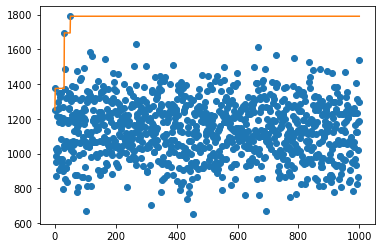

Najlepsze rozwiązanie: [ True False False False  True  True  True  True  True  True  True  True
  True False  True  True False  True False False  True False False False
 False False False  True False False  True False  True False  True  True
  True  True  True False  True  True  True False  True  True  True False
  True False]
Przedmioty: [ 0  4  5  6  7  8  9 10 11 12 14 15 17 20 27 30 32 34 35 36 37 38 40 41
 42 44 45 46 48]
Suma wag: 1103
Suma wartosci: 1790


In [34]:
sol_random_search = search_random(w, v, W, 1000)

print('Najlepsze rozwiązanie:',sol_random_search[0])
print('Przedmioty:',np.arange(num)[sol_random_search[0]])
print('Suma wag:', sol_random_search[1])
print('Suma wartosci:', sol_random_search[2])

## Greedy search - procedura optymalizacji zachłannej

Problemem w powyższym podejściu jest fakt, że kolejne rozwiązania nie korzystają z uzyskanej już wiedzy o najlepszych do tej pory rozwiązaniach. Zatem inna prosta heurytyka polega na wystartowaniu z losowego rozwiązania, a następnie modyfikowaniu go poprzez losowe dodawanie przedmiotu do plecaka. Jeśli zmiana (po ewentualnej naprawie) wprowadza poprawę, pozostajemy przy takim rozwiązaniu, jeśli następuje pogorszenie, odrzucamy takie rozwiązanie i ponawiamy próbę.

Taka procedura jest przykładem optymalizacji zachłannej.

In [61]:
def search_greedy_improvement(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        #set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx%num] == True:
            indx = indx + 1
        sol[indx%num] = True
        #correct if needed
        if w[sol].sum() > W:
            correct_solution(w,v,W,sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    #plt.figure()
    #plt.plot(v_all)
    #plt.plot(v_best)
    #plt.show()
    return best_sol, best_W, best_V, v_all, v_best 

__Przykładowe uruchomienie:__

In [62]:
sol_greedy = search_greedy_improvement(w,v,W,1000)

print('Najlepsze rozwiązanie:',sol_greedy[0])
print('Przedmioty:',np.arange(num)[sol_greedy[0]])
print('Suma wag:', sol_greedy[1])
print('Suma wartosci:', sol_greedy[2])

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True False False  True False  True  True False False  True
 False False  True  True False  True  True False  True  True  True False
 False False False False  True  True  True  True  True  True  True False
  True False]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 17 19 20 23 26 27 29 30 32 33
 34 40 41 42 43 44 45 46 48]
Suma wag: 1131
Suma wartosci: 2097


## Dwie inne proste heurystyki

### Najpierw najbardziej wartościowe

Jak dobre rozwiązanie dostaniemy, jeśli do plecaka pakować będziemy najpierw najbardziej wartościowe przedmioty (o ile się zmieszczą)? Pomysł ten jest zaimplementowany w poniższej funkcji.

In [63]:
#Pakuje najpierw najbardziej wartościowe przedmioty
def get_value_first(w, v, W):
    ii = np.argsort(-v)
    num = w.shape[0]
    sol = np.repeat(False, num)
    _W = 0
    for i in range(num):
        if _W + w[ii[i]] <= W:
            sol[ii[i]] = True
            _W = _W + w[ii[i]]
    _V = v[sol].sum()
    return sol, _W, _V

__Przykładowe uruchomienie:__

In [64]:
sol_value_first = get_value_first(w, v, W)

print('Najlepsze rozwiązanie:',sol_value_first[0])
print('Przedmioty:',np.arange(num)[sol_value_first[0]])
print('Suma wag:', sol_value_first[1])
print('Suma wartosci:', sol_value_first[2])

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False False  True False  True  True False False  True
 False  True  True  True False  True  True False  True False  True False
 False False False  True False  True  True  True  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 17 19 20 23 25 26 27 29 30 32 34
 39 41 42 43 44 45 46 48 49]
Suma wag: 1137
Suma wartosci: 2161


### Najpierw te o najlepszym stosunku wartości do wagi

Inny pomysł to pakowanie najpierw przedmiotów o najlepszym stosunku wartości do wagi.

In [65]:
def get_ratio_first(w, v, W):
    ii = np.argsort(-v/w) #stosunek wartosci do wagi
    num = w.shape[0]
    sol = np.repeat(False, num)
    _W = 0
    for i in range(num):
        if _W + w[ii[i]] <= W:
            sol[ii[i]] = True
            _W = _W + w[ii[i]]
    _V = v[sol].sum()
    return sol, _W, _V

__Przykładowe uruchomienie:__

In [66]:
sol_ratio_first = get_ratio_first(w, v, W)

print('Najlepsze rozwiązanie:',sol_ratio_first[0])
print('Przedmioty:',np.arange(num)[sol_ratio_first[0]])
print('Suma wag:', sol_ratio_first[1])
print('Suma wartosci:', sol_ratio_first[2])

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False False  True False  True  True False False  True
 False  True  True  True False  True  True False  True False  True False
 False False False  True  True  True  True False  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 17 19 20 23 25 26 27 29 30 32 34
 39 40 41 42 44 45 46 48 49]
Suma wag: 1119
Suma wartosci: 2153


## Zadanie 2 (obowiązkowe, 3 pkt.)

Opracowane być mogą inne procedury naprawcze. Przykładowo, dla rozwiązania niedopuszczalengo, zamiast zmieniać losowe bity True na False, jak w funkcji `correct_solution`, można usuwać najpierw te przedmioty, które mają najgorszy stosunek wartości do wagi. Zaimplementuj taką procedurę. 

Porównaj jej działanie z funkcją `correct_solution` w metodach RandomSearch oraz GreedySearch. Przedstaw uśrednione wyniki (co najmniej 10 uruchomień) i wnioski.

TWÓJ PROGRAM:

In [67]:
def correct_solution_new(w, v, W, sol):
    ii = np.argsort(v/w)
    num = w.shape[0]
    i = 0
    
    while w[sol].sum() > W:
        while sol[ii[i%num]] == False:
            i += 1
        sol[ii[i%num]] = False

TWOJE WYNIKI i WNIOSKI:

In [68]:
def get_random_solution_new(w, v, W):
    num = w.shape[0]
    sol = np.random.randint(0,2, size=num, dtype=bool)  # 1 / True oznacza, ze przedmiot jest wybrany
    _V = np.sum(v[sol])
    _W = np.sum(w[sol])
    if _W > W:
        correct_solution_new(w,v,W,sol)
        _V = np.sum(v[sol])
        _W = np.sum(w[sol])
    return sol, _W, _V

In [69]:
def search_greedy_improvement_new(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        #set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx%num] == True:
            indx = indx + 1
        sol[indx%num] = True
        #correct if needed
        if w[sol].sum() > W:
            correct_solution_new(w,v,W,sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
#    plt.figure()
#    plt.plot(v_all)
#    plt.plot(v_best)
#    plt.show()
    return best_sol, best_W, best_V, v_all, v_best 

In [77]:
avg_random = 0
avg_random_new = 0
avg_greedy = 0
avg_greedy_new = 0

for i in range(100):
    solution_random = get_random_solution(w, v, W)
    avg_random += solution_random[2]
    
    solution_random_new = get_random_solution_new(w, v, W)
    avg_random_new += solution_random_new[2]
    
    solution_greedy = search_greedy_improvement(w, v, W, 1000)
    avg_greedy += solution_greedy[2]
    
    solution_greedy_new = search_greedy_improvement_new(w, v, W, 1000)
    avg_greedy_new += solution_greedy_new[2]
    
print("Średnia random:", avg_random/100)
print("Średnia random_new:", avg_random_new/100)
print("Średnia greedy:", avg_greedy/100)
print("Średnia greedy_new:", avg_greedy_new/100)

Średnia random: 1224.5
Średnia random_new: 1235.53
Średnia greedy: 2124.32
Średnia greedy_new: 2153.4


Wnioski: Wyszukiwanie korzystające z correct_solution_new są znacząco lepsze. Co można zauważyć na wynikach wyżej

## Zadanie 3 (obowiązkowe, 6 pkt.)

Dostosuj swoją implementację algorytmu genetycznego do problemu plecakowego. 

- Jakie wyniki można uzyskać z jego pomocą? Czy działa on zawsze lepiej niż inne heurystyki?

- Która procedura naprawcza działa lepiej w algorytmie genetycznym?

- Przedstaw wnioski na podstawie uśrednionych wyników dla problemów plecakowych o rozmiarze 50, 100, 300.

- Problemy plecakowe i najlepsze znalezione rozwiązania zapisz do plików.

UWAGA! Po wygenerowaniu problemu plecakowego, przed uruchomieniem algorytmu genetycznego (lub innego) wywołaj:

`np.random.seed(int(time.time()))`

tak by problem plecakowy generował się ten sam, ale algorytmy miały szansę na nowy przebieg.

TWÓJ PROGRAM:

initial best 1876
better solution of  1905 in 6
better solution of  1958 in 7
better solution of  1975 in 19
better solution of  2007 in 22
better solution of  2037 in 23
better solution of  2053 in 31
better solution of  2054 in 38
better solution of  2057 in 46
better solution of  2069 in 47
better solution of  2074 in 50
better solution of  2127 in 52
better solution of  2139 in 55
better solution of  2161 in 82


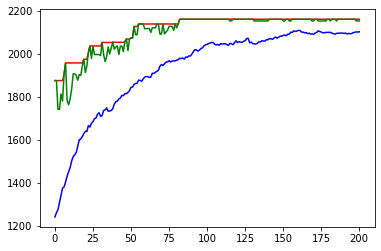

initial best 1774
better solution of  1877 in 1
better solution of  1928 in 7
better solution of  1949 in 13
better solution of  1961 in 16
better solution of  1999 in 17
better solution of  2020 in 20
better solution of  2064 in 24
better solution of  2084 in 59
better solution of  2097 in 63
better solution of  2102 in 77
better solution of  2117 in 78
better solution of  2132 in 87
better solution of  2161 in 110


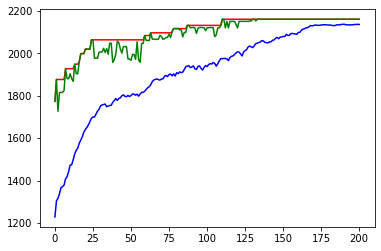

initial best 1782
better solution of  1819 in 13
better solution of  1871 in 19
better solution of  1879 in 20
better solution of  1925 in 22
better solution of  1966 in 36
better solution of  1969 in 43
better solution of  1998 in 44
better solution of  2044 in 59
better solution of  2049 in 93
better solution of  2050 in 101
better solution of  2055 in 103
better solution of  2064 in 109
better solution of  2127 in 159


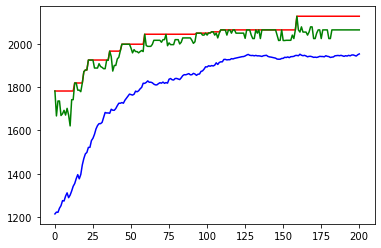

initial best 1717
better solution of  1861 in 1
better solution of  1939 in 2
better solution of  1946 in 20
better solution of  2035 in 21
better solution of  2061 in 24
better solution of  2062 in 51
better solution of  2076 in 58
better solution of  2096 in 59
better solution of  2106 in 72
better solution of  2124 in 74
better solution of  2136 in 91
better solution of  2138 in 98
better solution of  2153 in 105
better solution of  2161 in 107


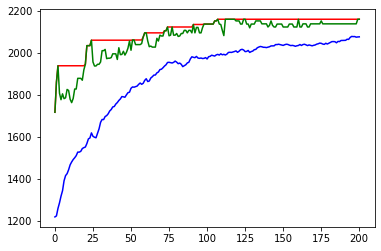

initial best 1714
better solution of  1755 in 3
better solution of  1767 in 4
better solution of  1839 in 5
better solution of  1860 in 7
better solution of  1931 in 8
better solution of  1943 in 15
better solution of  1949 in 16
better solution of  2066 in 20
better solution of  2093 in 43
better solution of  2106 in 53
better solution of  2137 in 141


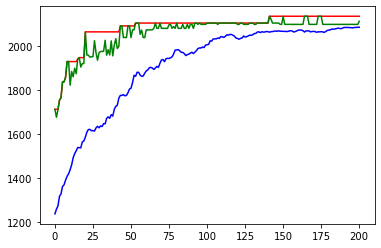

initial best 1712
better solution of  1715 in 2
better solution of  1724 in 3
better solution of  1920 in 4
better solution of  1962 in 14
better solution of  1984 in 15
better solution of  1990 in 23
better solution of  2027 in 25
better solution of  2042 in 26
better solution of  2047 in 33
better solution of  2083 in 35
better solution of  2097 in 39
better solution of  2127 in 48
better solution of  2135 in 65
better solution of  2161 in 79


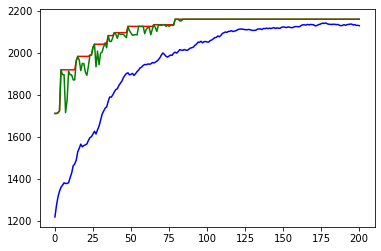

initial best 1722
better solution of  1734 in 3
better solution of  1746 in 5
better solution of  1758 in 6
better solution of  1856 in 7
better solution of  1860 in 9
better solution of  1866 in 10
better solution of  1867 in 14
better solution of  1891 in 16
better solution of  1897 in 18
better solution of  1922 in 19
better solution of  1973 in 20
better solution of  2000 in 27
better solution of  2035 in 28
better solution of  2059 in 36
better solution of  2070 in 42
better solution of  2081 in 44
better solution of  2095 in 45
better solution of  2116 in 49
better solution of  2139 in 51


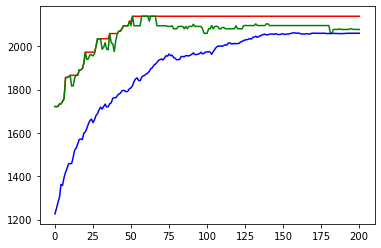

initial best 1699
better solution of  1703 in 1
better solution of  1763 in 2
better solution of  1819 in 3
better solution of  1831 in 5
better solution of  1849 in 13
better solution of  1883 in 14
better solution of  1906 in 17
better solution of  1917 in 18
better solution of  1924 in 19
better solution of  1941 in 21
better solution of  1943 in 22
better solution of  2037 in 23
better solution of  2040 in 38
better solution of  2041 in 40
better solution of  2047 in 45
better solution of  2057 in 56
better solution of  2058 in 73
better solution of  2071 in 78
better solution of  2111 in 81
better solution of  2117 in 85
better solution of  2129 in 91
better solution of  2153 in 117


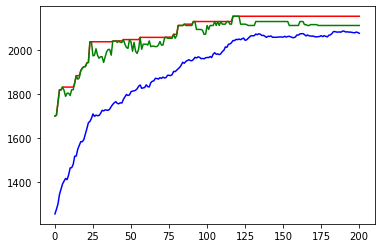

initial best 1797
better solution of  1979 in 3
better solution of  1980 in 25
better solution of  1985 in 31
better solution of  2009 in 41
better solution of  2011 in 47
better solution of  2061 in 50
better solution of  2066 in 53
better solution of  2097 in 58
better solution of  2108 in 60
better solution of  2121 in 70
better solution of  2132 in 88
better solution of  2153 in 99
better solution of  2161 in 122


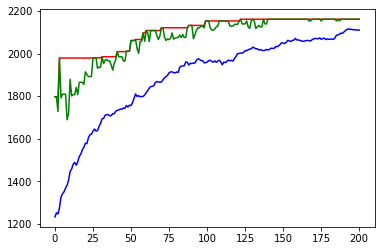

initial best 1775
better solution of  1846 in 1
better solution of  1849 in 10
better solution of  1855 in 11
better solution of  1893 in 12
better solution of  1903 in 14
better solution of  1911 in 15
better solution of  2002 in 16
better solution of  2009 in 30
better solution of  2108 in 32
better solution of  2137 in 125


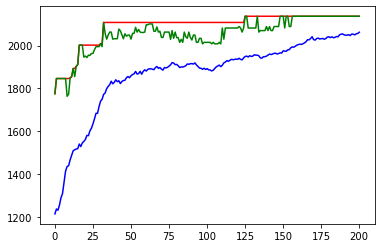

Problem plecakowy o wielkości 50 ---Średnia wartość :  2149.8
initial best 1595
better solution of  1630 in 1
better solution of  1632 in 3
better solution of  1741 in 4
better solution of  1792 in 5
better solution of  1807 in 6
better solution of  1823 in 7
better solution of  1889 in 9
better solution of  1930 in 14
better solution of  1941 in 26
better solution of  1953 in 30
better solution of  1984 in 32
better solution of  1998 in 39
better solution of  2002 in 40
better solution of  2055 in 41
better solution of  2089 in 58
better solution of  2094 in 73
better solution of  2101 in 78
better solution of  2111 in 80
better solution of  2131 in 82
better solution of  2135 in 83
better solution of  2153 in 86


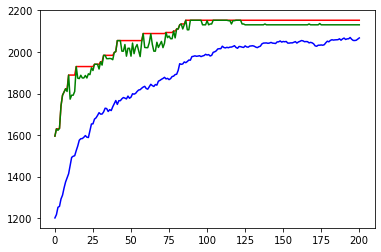

initial best 1885
better solution of  1899 in 17
better solution of  1933 in 20
better solution of  1992 in 25
better solution of  2023 in 26
better solution of  2036 in 39
better solution of  2039 in 40
better solution of  2042 in 42
better solution of  2057 in 43
better solution of  2084 in 44
better solution of  2102 in 67
better solution of  2111 in 78
better solution of  2129 in 85
better solution of  2151 in 185


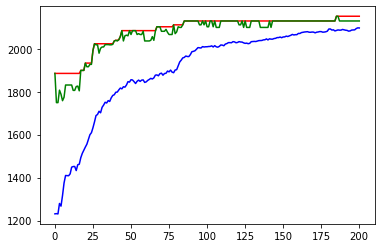

initial best 1860
better solution of  1874 in 8
better solution of  1949 in 13
better solution of  1990 in 15
better solution of  2048 in 19
better solution of  2079 in 27
better solution of  2101 in 28
better solution of  2115 in 32
better solution of  2137 in 36
better solution of  2139 in 37
better solution of  2161 in 49


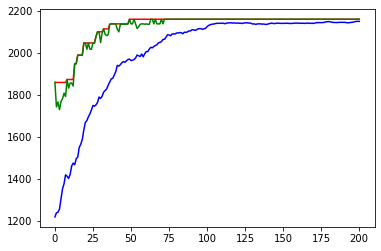

initial best 1629
better solution of  1730 in 1
better solution of  1746 in 2
better solution of  1753 in 3
better solution of  1799 in 16
better solution of  1850 in 17
better solution of  1866 in 19
better solution of  1898 in 22
better solution of  1980 in 25
better solution of  2013 in 37
better solution of  2027 in 41
better solution of  2049 in 51
better solution of  2107 in 59
better solution of  2111 in 67
better solution of  2119 in 96
better solution of  2132 in 108
better solution of  2153 in 135


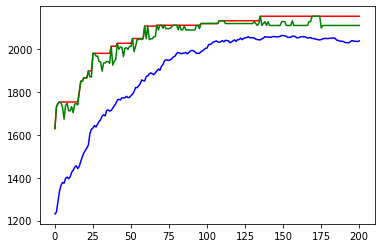

initial best 1749
better solution of  1776 in 2
better solution of  1794 in 5
better solution of  1802 in 15
better solution of  1821 in 16
better solution of  1834 in 21
better solution of  1861 in 22
better solution of  1880 in 24
better solution of  1906 in 25
better solution of  2011 in 29
better solution of  2020 in 45
better solution of  2036 in 52
better solution of  2078 in 53
better solution of  2090 in 56
better solution of  2091 in 61
better solution of  2095 in 64
better solution of  2098 in 73
better solution of  2138 in 75
better solution of  2153 in 78


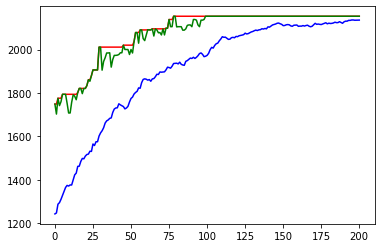

initial best 1725
better solution of  1792 in 1
better solution of  1802 in 4
better solution of  1848 in 6
better solution of  1851 in 12
better solution of  1938 in 13
better solution of  2024 in 14
better solution of  2078 in 29
better solution of  2098 in 36
better solution of  2113 in 39
better solution of  2120 in 43
better solution of  2129 in 47


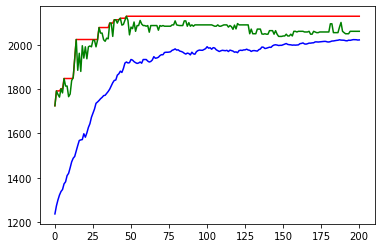

initial best 1705
better solution of  1734 in 1
better solution of  1799 in 7
better solution of  1824 in 11
better solution of  1840 in 12
better solution of  1897 in 14
better solution of  1900 in 16
better solution of  1914 in 17
better solution of  1918 in 21
better solution of  1937 in 22
better solution of  1948 in 25
better solution of  1958 in 30
better solution of  1985 in 32
better solution of  2002 in 37
better solution of  2021 in 38
better solution of  2050 in 39
better solution of  2064 in 40
better solution of  2080 in 54
better solution of  2083 in 66
better solution of  2085 in 67
better solution of  2093 in 69
better solution of  2127 in 86
better solution of  2135 in 96
better solution of  2151 in 98
better solution of  2153 in 105
better solution of  2161 in 124


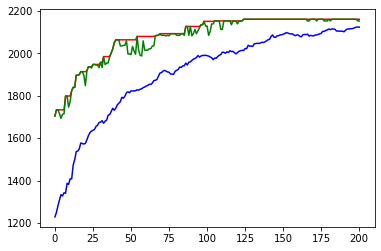

initial best 1624
better solution of  1734 in 1
better solution of  1761 in 2
better solution of  1799 in 3
better solution of  1846 in 10
better solution of  1859 in 11
better solution of  1908 in 12
better solution of  1949 in 13
better solution of  1978 in 22
better solution of  1986 in 24
better solution of  2032 in 26
better solution of  2047 in 36
better solution of  2083 in 38
better solution of  2107 in 39
better solution of  2131 in 41
better solution of  2132 in 142


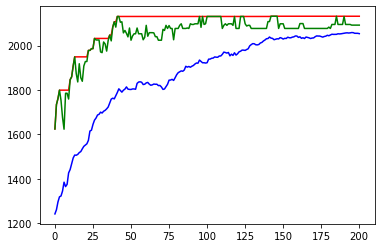

initial best 1616
better solution of  1638 in 1
better solution of  1706 in 2
better solution of  1757 in 5
better solution of  1770 in 6
better solution of  1806 in 7
better solution of  1851 in 8
better solution of  1860 in 11
better solution of  1915 in 17
better solution of  1925 in 19
better solution of  2003 in 21
better solution of  2033 in 29
better solution of  2045 in 35
better solution of  2047 in 38
better solution of  2069 in 39
better solution of  2107 in 41
better solution of  2109 in 47
better solution of  2128 in 52
better solution of  2131 in 166
better solution of  2139 in 171


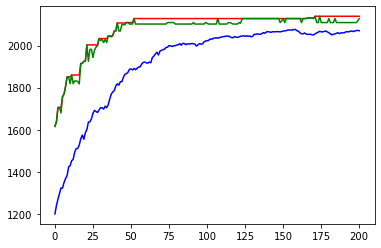

initial best 1777
better solution of  1919 in 6
better solution of  1956 in 11
better solution of  2034 in 22
better solution of  2054 in 25
better solution of  2092 in 27
better solution of  2114 in 33
better solution of  2138 in 43
better solution of  2153 in 67


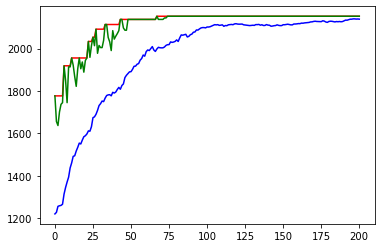

Problem plecakowy o wielkości 100 ---Średnia wartość ::  2148.5
initial best 1683
better solution of  1703 in 1
better solution of  1836 in 6
better solution of  1918 in 9
better solution of  1944 in 12
better solution of  1993 in 19
better solution of  2026 in 20
better solution of  2037 in 22
better solution of  2071 in 25
better solution of  2073 in 32
better solution of  2077 in 41
better solution of  2095 in 42
better solution of  2125 in 44
better solution of  2139 in 52
better solution of  2153 in 92


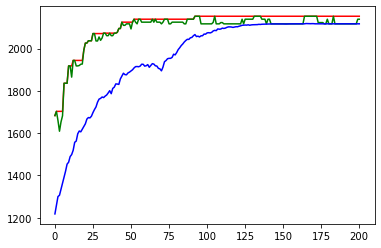

initial best 1676
better solution of  1746 in 1
better solution of  1774 in 3
better solution of  1789 in 5
better solution of  1872 in 7
better solution of  1918 in 11
better solution of  1936 in 19
better solution of  2042 in 21
better solution of  2066 in 34
better solution of  2077 in 44
better solution of  2079 in 46
better solution of  2086 in 47
better solution of  2119 in 48
better solution of  2153 in 59
better solution of  2161 in 170


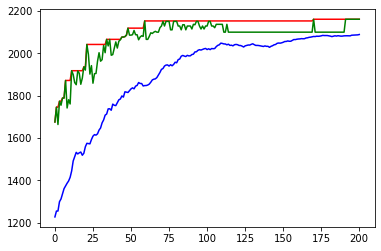

initial best 1771
better solution of  1851 in 1
better solution of  1900 in 3
better solution of  1921 in 14
better solution of  1933 in 16
better solution of  1945 in 19
better solution of  1981 in 21
better solution of  1993 in 22
better solution of  2006 in 29
better solution of  2038 in 33
better solution of  2043 in 36
better solution of  2068 in 38
better solution of  2078 in 53
better solution of  2093 in 54
better solution of  2097 in 64
better solution of  2112 in 66
better solution of  2117 in 68
better solution of  2161 in 88


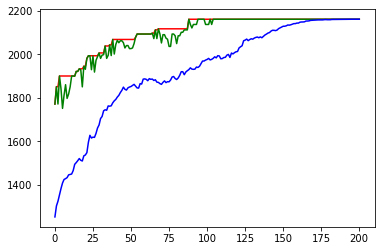

initial best 1771
better solution of  1840 in 7
better solution of  1869 in 17
better solution of  1872 in 20
better solution of  1914 in 21
better solution of  1942 in 22
better solution of  1974 in 26
better solution of  2029 in 27
better solution of  2054 in 33
better solution of  2056 in 41
better solution of  2089 in 42
better solution of  2121 in 180


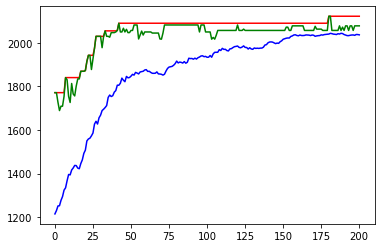

initial best 1689
better solution of  1769 in 1
better solution of  1891 in 7
better solution of  1914 in 11
better solution of  1964 in 14
better solution of  1985 in 15
better solution of  2055 in 16
better solution of  2076 in 17
better solution of  2090 in 24
better solution of  2095 in 29
better solution of  2097 in 36
better solution of  2115 in 40
better solution of  2127 in 41
better solution of  2139 in 68


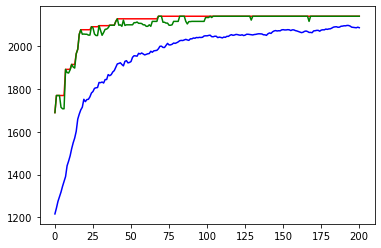

initial best 1656
better solution of  1664 in 1
better solution of  1666 in 2
better solution of  1740 in 3
better solution of  1747 in 6
better solution of  1820 in 7
better solution of  1832 in 9
better solution of  1879 in 13
better solution of  1915 in 18
better solution of  1928 in 22
better solution of  1989 in 28
better solution of  2023 in 31
better solution of  2027 in 35
better solution of  2044 in 40
better solution of  2053 in 55
better solution of  2056 in 57
better solution of  2072 in 59
better solution of  2092 in 63
better solution of  2099 in 74
better solution of  2139 in 102
better solution of  2161 in 156


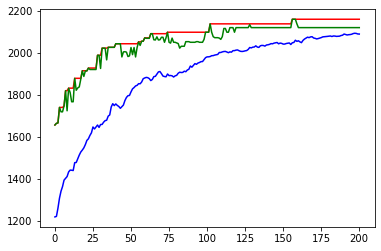

initial best 1602
better solution of  1659 in 1
better solution of  1682 in 2
better solution of  1789 in 5
better solution of  1811 in 7
better solution of  1841 in 11
better solution of  1870 in 17
better solution of  1888 in 25
better solution of  1981 in 26
better solution of  1993 in 31
better solution of  1996 in 37
better solution of  2031 in 43
better solution of  2078 in 53
better solution of  2100 in 60
better solution of  2125 in 71
better solution of  2139 in 73
better solution of  2153 in 119
better solution of  2161 in 120


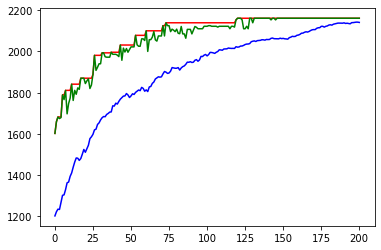

initial best 1852
better solution of  1887 in 11
better solution of  1899 in 15
better solution of  1939 in 18
better solution of  1950 in 20
better solution of  1996 in 21
better solution of  1998 in 22
better solution of  2010 in 24
better solution of  2017 in 26
better solution of  2024 in 27
better solution of  2028 in 29
better solution of  2074 in 31
better solution of  2115 in 49
better solution of  2137 in 62
better solution of  2151 in 64


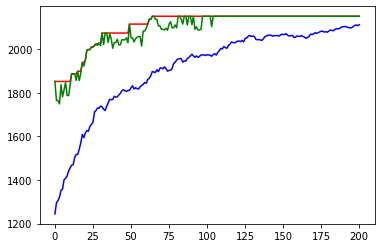

initial best 1659
better solution of  1804 in 1
better solution of  1920 in 5
better solution of  1997 in 8
better solution of  2011 in 21
better solution of  2017 in 33
better solution of  2080 in 34
better solution of  2093 in 39
better solution of  2099 in 49
better solution of  2101 in 50
better solution of  2139 in 81
better solution of  2153 in 116


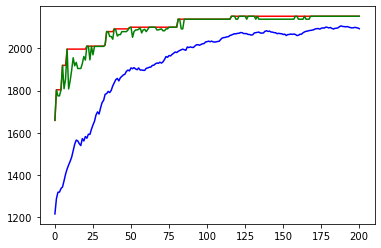

initial best 1659
better solution of  1750 in 1
better solution of  1805 in 2
better solution of  1875 in 8
better solution of  1904 in 12
better solution of  1929 in 13
better solution of  1939 in 15
better solution of  1942 in 16
better solution of  2007 in 17
better solution of  2015 in 24
better solution of  2039 in 28
better solution of  2061 in 29
better solution of  2081 in 47
better solution of  2135 in 48
better solution of  2153 in 131


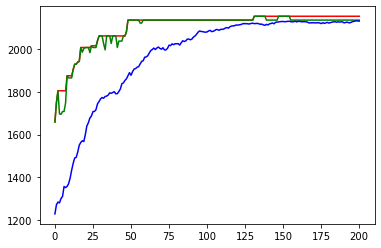

Problem plecakowy o wielkości 300 ---Średnia wartość :  2151.4
--------------ZAPISAŁEM DO PLIKÓW---------------


In [85]:
import time

def gen_pop(w, v, W, pop_size):
    pop = np.random.randint(2, size = (pop_size, len(w)), dtype=bool)
    for i in range(len(pop)):
        correct_solution_new(w,v,W,pop[i]);
    return pop

def evaluate(pop, v):
    evaluated = []
    for i in range(len(pop)):
        evaluated.append(v[pop[i]].sum())
    return np.array(evaluated)

def select(pop, evals):
    intervals = [0]
    current = 0

    for i,e in enumerate(evals):
        prop = e/evals.sum()
        current = prop + current
        intervals.append(current)

    intervals = np.array(intervals)
    new_pop = []
    for i,e in enumerate(np.random.random(evals.size)):
        for j,interval in enumerate(intervals):
            if interval >= e:
                new_pop.append(pop[j - 1])
                break
    return np.array(new_pop)

def xover(pop, p, w,v,W):  # p - prawdopodobienstwo krzyzowania
    new_pop = []
    for i,e in enumerate(pop):
        if np.random.random() <= p:
            next_index = (i+1)%pop.shape[0]
            cross_point = np.random.randint(pop.shape[1])
            new_pop.append(np.concatenate((e[:cross_point], pop[next_index][cross_point:])))
        else:
            new_pop.append(e)
    for i in range(len(new_pop)):
        correct_solution_new(w,v,W,new_pop[i]);
    return np.array(new_pop)

def mutate(pop, p, w,v,W):  # p - prawdopodobienstwo mutacji
    new_pop = np.array(pop)
    for i,e in enumerate(new_pop):
        if np.random.random() <= p:
            index = np.random.randint(new_pop.shape[1])
            e[index] = 1 if e[index] == 0 else 1
    for i in range(len(new_pop)):
        correct_solution_new(w,v,W,new_pop[i]);
    return np.array(new_pop)


def evolve_knapsack(w, v, W, pop_size, pxover, pmutate, generations):
    pop = gen_pop(w,v,W, pop_size)
    evals = evaluate(pop, v)
    i = np.argmax(evals)
    best = pop[i].copy()
    best_V = evals[i]
    best_iter = 0
    v_all = [best_V]
    v_best = [best_V]
    v_mean = [np.mean(evals)]
    
    print('initial best', best_V)
    
    for i in range(generations):
        pop = select(pop, evals)
        pop = xover(pop, pxover, w,v,W)
        pop = mutate(pop, pmutate, w,v,W)
        evals = evaluate(pop, v)
        ii = np.argmax(evals)
        temp_best_v = evals[ii]
        if temp_best_v > best_V:
            best_V = temp_best_v
            best_iter = i+1
            best = pop[ii].copy()
            print('better solution of ', best_V, 'in', best_iter)
        v_all.append(temp_best_v)
        v_best.append(best_V)
        v_mean.append(np.mean(evals))
    
    plt.plot(v_best, 'r')
    plt.plot(v_all, 'g')
    plt.plot(v_mean, 'b')
    plt.show()
    return best, w[best].sum(), best_V

def gen_problem(num):
    np.random.seed(134124)
    w, v = generate_problem(wmin, wmax, vmin, vmax, num)  # w - wagi, v - wartosci
    Wall = w.sum()
    Vall = v.sum()
    W = int(knapsack_perc * Wall) # pojemnosc 

results = []
max_sol = 0

gen_problem(50)
np.random.seed(int(time.time()))
for i in range(10):
    solution = evolve_knapsack(w, v, W, 200, 0.7, 0.01, 200)[2]
    results.append(solution)
    if solution > max_sol:
        max_sol = solution
f = open("PLECAK_50.txt", "w", encoding="utf-8")
f.write("Wagi: " + str(w) + "\n")
f.write("Wartości: " + str(v) + "\n")
f.write("Maksymalna waga: " + str(W) + "\n")
f.write("Beast : " + str(max_sol) + "\n")
f.close()
print("Problem plecakowy o wielkości 50 ---Średnia wartość : ", np.array(results).mean())

results = []
max_sol = 0

gen_problem(100)
np.random.seed(int(time.time()))
for i in range(10):
    solution = evolve_knapsack(w, v, W, 200, 0.7, 0.01, 200)[2]
    results.append(solution)
    if solution > max_sol:
        max_sol = solution
f = open("PLECAK_100.txt", "w", encoding="utf-8")
f.write("Wagi: " + str(w) + "\n")
f.write("Wartości: " + str(v) + "\n")
f.write("Maksymalna waga: " + str(W) + "\n")
f.write("Beast: " + str(max_sol) + "\n")
f.close()
print("Problem plecakowy o wielkości 100 ---Średnia wartość :: ", np.array(results).mean())

results = []
max_sol = 0

gen_problem(300)
np.random.seed(int(time.time()))
for i in range(10):
    solution = evolve_knapsack(w, v, W, 200, 0.7, 0.01, 200)[2]
    results.append(solution)
    if solution > max_sol:
        max_sol = solution
f = open("PLECAK_300.txt", "w", encoding="utf-8")
f.write("Wagi: " + str(w) + "\n")
f.write("Wartości: " + str(v) + "\n")
f.write("Maksymalna waga: " + str(W) + "\n")
f.write("Beast: " + str(max_sol) + "\n")
f.close()
print("Problem plecakowy o wielkości 300 ---Średnia wartość : ", np.array(results).mean())
print("--------------ZAPISAŁEM DO PLIKÓW---------------")

TWOJE WYNIKI i WNIOSKI:

&copy; Katedra Informatyki, Politechnika Krakowska